# Systemtechnik für Energieeffizienz - Modelle bilden

<div class="admonition note" style="background: #e5f1ff; padding: 10px">
<div class="title"><b>Lernziele für diese Einheit:</b></div>
    <ul>
        <li> Messdaten und Annahmen in Modellen zusammenführen </li>
        <li> Jahresverbräuche modellieren </li>
        <li> Lastprofile generieren </li>
    </ul>
</div>

Bibliotheken für python

In [1]:
import platform
import sys
from PIL import Image
import requests
import matplotlib
#matplotlib.use('qt5agg')
import matplotlib.pyplot as plt
from matplotlib import rcParams
import numpy as np
import seaborn as sns
import os.path
import pandas as pd
from scipy.optimize import curve_fit
from distutils.spawn import find_executable



if platform.system() == 'Linux':
    import schemdraw
    import schemdraw.elements as elm
else:
    import schemdraw as schemdraw
    import schemdraw.elements as elm    

%matplotlib inline

Grafikparameter für die Diagramme festlegen:

In [2]:
plt.rcParams['savefig.dpi'] = 75
plt.rcParams['figure.autolayout'] = False
plt.rcParams['figure.figsize'] = 10, 6
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['font.size'] = 18
plt.rcParams['lines.linewidth'] = 2.0
plt.rcParams['lines.markersize'] = 8
plt.rcParams['legend.fontsize'] = 18
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16

if find_executable('latex'):
    plt.rcParams['text.usetex'] = True
    pd.set_option('display.latex.repr', True)
    pd.set_option('display.latex.longtable', True)

## Überblick Modellbildung

![Modellbildungsprozess](../img/modellbildungsprozess.png)

### Energiebedarf modellieren

![Energiebedarf aus Fishbone](../img/energiebedarf-modellieren-fishbone.png)

### Mathematische Modellierung

![Mathematische Modellierung von Energiedaten](../img/prozess-energie-mathematisch-modellieren.png)

- Energie-Datenbank:
 - Messdaten
 - historische Daten
- Mathematisches Modell: 
 - wichtige Einflussfaktoren
 - Annahmen über (Abhängigkeiten von) Einflussfaktoren, z. B. Klima, Helligkeit, Wochentag
- Lastprofil überprüfen mit
 - Annahmen, z. B. tatsächlich x Waschgänge pro Jahr?
 - Kontrollsummen, z. B. jährlicher Energieverbrauch aus anderen Quellen

### Energieströme (nach \cite{hesselbach_energie-_2012})

| **Energiestrom** | **Formelbeschreibung** | **Messgröße(n)** | **Bemerkung** |
|-|-|-|-|
| Elektrische Wirkleistung $P$ | $P = S\cdot \lambda$ | $u(t)$, $i(t)$ | häufig integrierte Messgeräte |
| Lichtleistung | $E_\nu = d\Phi_\nu / dA$ | Beleuchtungsstärke (lux), W/m² | sichtbar $E_\nu \neq E_{ges}$ |
| Druckluft | $P_{\text{DL}} = \dot{V}\cdot p_{\text{DL}}$ | $\dot{V}$, $p_{\text{DL}}$ | Normbedingungen |   
| Hydraulik | $P_{\text{Hy}} = \dot{V}\cdot p_{\text{Hy}}$ | $\dot{V}$, $p_{\text{Hy}}$ | ` ` |   
| Wärme (Konvektion) | $\dot{q_{\text{conv}}} = \alpha_{\text{conv}} \cdot (T_{\text{Wand}} - T_{\text{Umgebung}})$ | $T_{\text{Wand}}$, $T_{\text{Umgebung}}$ | $\alpha$ aus Tabellen oder Nebenrechnungen | 
| Wärme (Durchgang) | $\dot{q} = U_{\text{th}} \cdot (T_i - T_a)$ | $T_i$, $T_a$ | $U_{\text{th}}$ aus Tabellen oder Nebenrechnungen |
| Wärme (Strahlung) | $\dot{q_{\text{rad,12}}} = \sigma_{12} \cdot (T_1^4 - T_2^4)$ | $T_1$, $T_2$ | $\sigma_{12}$ aus Kalibriermessungen | 
| Wärme (Enthalpiestrom) | $\dot{q_h} = \dot{m_c}\cdot(T_{\text{ein}} - T_{\text{aus}})$ | $\dot{m}$, $T_\text{ein}$, $T_{\text{aus}}$ | Wärmekapazitäten $c$ aus Tabellen |
| Wärme (Verbrennung) | $\dot{q} = \eta_{\text{WE}}\cdot\dot{m_{\text{Brennst}}}\cdot\Delta h_{\text{u,Brennst}}$ | $\dot{m_{\text{Brennst}}}$ | Verbrennungsenthalpie aus Tabellen |
| Wärme (Phasenübergang) | $\dot{q_{\text{12,rev}}}\approx\dot{m}\cdot r_D$ | $\dot{m}$ | Enthalpie aus Tabellen | 

### Energieträger (nach \cite{hesselbach_energie-_2012})

- Strom
- Licht
- Gase (z. B. Erdgas)
- Feststoffe (z. B. Kohle, Holzpellets)
- Flüssigkeiten (z. B. Öl)
- Druckluft, Hydrauliköl
- Wärmeübertragung: Heißwasser, Dampf, Heißluft, Kühlwasser, Kühlluft

<div class="admonition important" style="background: #e9f6ec; padding: 10px">
<div class="title"><b>AUFGABE</b></div>
Wie sieht das Energieflussbild für Ihr Projekt aus? Welche Energieströme und Energieträger spielen die Hauptrolle? Welche sind vernachlässigbar? Was sind Ihre Systemgrenzen? Wo können Sie Kontrollsummen bilden? Welche Komponenten hat Ihr System? Welche Parameter sind variabel und welche fest?
</div>

*Antwort:...*

## Messdaten im Modell verwenden

- punktuelle Messungen über das Jahr verteilt im Lastprofil ansetzen, z. B. monatliche Kochwäsche
- verschiedene Nutzungsarten des Gerätes entsprechend Ihrer Nutzung addieren
- Kontrollsumme bilden: die darf natürlich höher sein als im Energielabel! (warum?)

## Künstliche Profile ergänzen (nach \cite{schellong_modellierung_2000})

- Lastprofil = Zeitreihenmodell
- kein zwingender, expliziter, kausaler Zusammenhang zwischen Einflussgrößen und Energiebedarf, daher Plausibilisierung notwendig
- Energiebedarf = f(Zeit)
- künstlich definierbar (sicher jeweils mehrere Terme durch verschiedene Einflussfaktoren)
 - saisonale Variation $S(t)$
 - Trend $T(t)$
 - überjährige zyklische Komponenten $C(t)$
 - Ausreißer $R(t)$
 - additives Zeitreihenmodell: $y(t) = T(t) + S(t) + C(t) + R(t)$
 - Hybrides Zeitreihenmodell: $y(t) = T(t)\cdot S(t) + R(t)$

<div class="admonition important" style="background: #e9f6ec; padding: 10px">
<div class="title"><b>AUFGABE</b></div>
Welche Art von Modellierung wollen Sie für Ihre Verbrauchsdaten im Projekt wählen? Was benötigen Sie dafür? Wie binden Sie die Messdaten ein? Welche Möglichkeiten gibt es, die Validität zu prüfen?
</div>

*Antwort:...*

### Warum eigentlich nicht (oder doch?) MATLAB?

Der Kurs läuft in python, zwei Sprachen sind zuviel. Dennoch, MATLAB ist so bekannt, da weise ich noch auf folgendes hin: https://blogs.mathworks.com/cleve/2017/10/23/two-other-matlabs-in-bangladesh-and-in-hindi/

*Jupyter Notebooks lassen sich nicht nur mit python, sondern auch mit MATLAB nutzen (sofern eine Lizenz und Installation auf dem Rechner verfügbar ist). Viele ausgefeilte Modelle existieren in MATLAB und wenn Ihre Kollegen alle MATLAB nutzen, dann macht es Sinn, das auch zu tun. Wenn Sie jedoch neu anfangen, die Lizenzgebühren für MATLAB scheuen und/ oder sowieso Ihre Kollegen in python arbeiten, dann ist python die bessere Wahl.*

## Elektrische Energie modellieren

Die Grundbegriffe lesen Sie bitte nochmal nach in [SYE elektrische Energie messen](SYE-elektrischeEnergiemessen.ipynb), falls nicht mehr geläufig.

Der Gesamtstrom (d.h. der Betrag des Stromes, bestehend aus Wirk-, Blind- und Verzerrungsanteilen) verursacht **Wärmeverluste** in Betriebsmitteln und Leitungen:
\begin{equation}
P_V = I_{ges}^2 \cdot R
\end{equation}

Diese Verluste lassen sich reduzieren mit **Blindstromkompensation**, d.h. Einsatz von Kondensatoren / Induktivitäten parallel zum Verbraucher, so dass Betriebsmittel weniger Strom tragen.

### Modellieren eines Ohmsch-Induktiven Verbrauchers und Blindstromkompensation

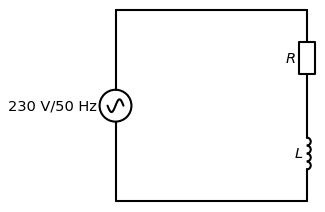

In [3]:
d = schemdraw.Drawing()
d.add(elm.LINE, d='right',l=6)
d.add(elm.RBOX, d='down', label='$R$')
d.add(elm.INDUCTOR,d='down',label='$L$')
d.add(elm.LINE, d='left',l=6)
d.add(elm.SOURCE_SIN, d='up', label='230 V/50 Hz',l=6)
d.draw()

Komplexer Widerstand des Verbrauchers $Z = R + jX $ in einem Arbeitspunkt: In diesem Arbeitspunkt verbraucht der Verbraucher die Wirkleistung $P$, modelliert durch den Ohmschen Widerstand $R$ und die Blindleistung $Q$, modelliert durch die Induktivität $L$. <br><br>
Im Teillastbereich kann es durchaus so sein, dass sich nicht nur der Wirkungsgrad, sondern auch der $\cos\varphi$ ändert, dann ist ein verändertes Modell nötig, z. B. eine verhältnismäßig größere oder kleinere Induktivität. 

Durch Einsatz eines Kondensators lässt sich der Blindstrom eines Ohmsch-Induktiven Verbrauchers **kompensieren**:

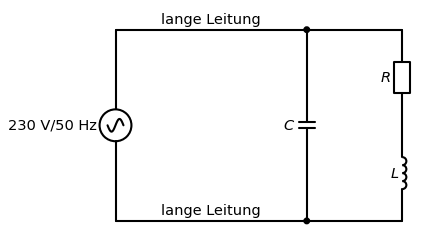

In [4]:
d = schemdraw.Drawing()
d.add(elm.LINE, d='right',label='lange Leitung',l=6)
d.add(elm.DOT)
d.push()
d.add(elm.LINE, d='right')
d.add(elm.RBOX, d='down', label='$R$')
d.add(elm.INDUCTOR,d='down',label='$L$')
d.add(elm.LINE, d='left')
d.add(elm.DOT)
d.add(elm.LINE, d='left',l=6,label='lange Leitung')
d.add(elm.SOURCE_SIN, d='up', label='230 V/50 Hz',l=6)
d.pop()
d.add(elm.CAP, d='down', l=6, label='$C$')
d.draw()

Dadurch sinkt der Blindstromanteil, auf den Leitungen und an der Spannungsquelle und es sinken dort die Ohmschen Verluste. Denn der Blindstrom schwingt jetzt nicht mehr im ganzen System hin- und her, sondern nur noch zwischen Induktivität und Kondensator. Häufig findet dies Anwendung bei Elektromotoren, Leuchtstofflampen, ...

Wie kann man die Einsparung modellieren?

Sie ermitteln den Gesamtstrom auf der Leitung mit $I = S/U$ **vor der Kompensation** und **nach der Kompensation**. Vor der Kompensation ist $S_v = P/\cos\varphi_v$, nach der Kompensation gilt $S_n = P/\cos\varphi_n$. Nun können Sie ermitteln, welche Einsparungen Blindstromkompensation in Ihrem Fall bringt.

<div class="admonition note" style="background: #e5f1ff; padding: 10px">
<div class="title"><b>Aufgabe</b></div>
Betrachten Sie einen Motor, dessen  cos𝜑  vor der Kompensation 0,65 beträgt und der auf 0,85 kompensiert werden soll. Um wieviel Prozent verringern sich die Leitungsverluste?
</div>

*Antwort:...*

### Verzerrungsblindleistung reduzieren

- Ziel: Leistungsfaktor $\lambda\to1$, um andere Geräte nicht zu stören (EMV = elektromagnetische Verträglichkeit)
- $\lambda = \frac{P}{S} = \frac{P}{\sqrt{P^2 + Q^2 + D^2 }}$
- Leistungsfaktorkorrekturfilter (engl. PFC power factor control) ab 75 W Pflicht
 - passiv (mit Spulen und Kondensatoren): bis ca. 200 W sinnvoll, $\lambda \approx 0,7 ..0,8$
 - aktiv (mit aktiven Halbleitern wie Transistoren): über 200 W, $\lambda\approx0,98$
- Häufige Beispiele: Schaltnetzteile

Modellierung: wie oben mit $\lambda_{vorher}$ und $\lambda_{nachher}$.

### Wirkungsgrade von Elektromotoren

die [COMMISSION  REGULATION  (EC)  No  640/2009of  22  July  2009implementing  Directive  2005/32/EC  of  the  European  Parliament  and  of  the  Council  with  regard  to  ecodesign  requirements  for  electric  motors](https://eur-lex.europa.eu/LexUriServ/LexUriServ.do?uri=OJ:L:2009:191:0026:0034:EN:PDF) {cite:p}``european_commission_commission_2009`` lässt sich leider nicht automatisiert auslesen (pdf) - wenn man sich das Abtippen sparen will, kann man so eine Tabelle allerdings in ein Tabellenkalkulationsprogramm hineinkopieren, als csv speichern und dann weiterverarbeiten, und reduziert so die Tippfehler

Text(200, 87, 'Quelle:\nCOMMISSION\nREGULATION\n(EC)  No  640/2009')

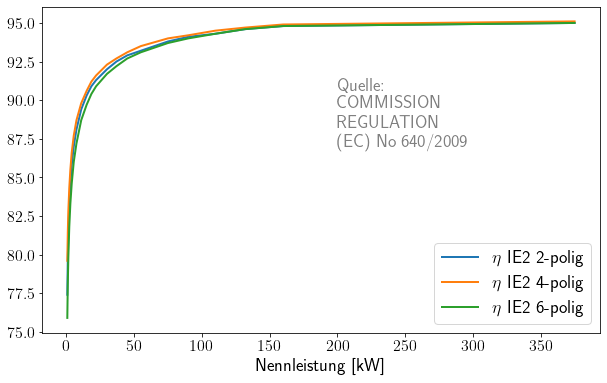

In [3]:
RatedOutputPowerkW = [0.75, 1.1, 1.5, 2.2, 3, 4, 5.5, 7.5, 11, 15, 18.5, 22, 30, 37, 45, 55, 75, 90, 110, 132, 160, 375]
IE2mineta2pole = [77.4,79.6,81.3,83.2,84.6,85.8,87,88.1,89.4,90.3,90.9,91.3,92,92.5,92.9,93.2,93.8,94.1,94.3,94.6,94.8,95]
IE2mineta4pole = [79.6,81.4,82.8,84.3,85.5,86.6,87.7,88.7,89.8,90.6,91.2,91.6,92.3,92.7,93.1,93.5,94,94.2,94.5,94.7,94.9,95.1]
IE2mineta6pole = [75.9,78.1,79.8,81.8,83.3,84.6,86,87.2,88.7,89.7,90.4,90.9,91.7,92.2,92.7,93.1,93.7,94,94.3,94.6,94.8,95]
plt.plot(RatedOutputPowerkW,IE2mineta2pole,label='$\eta$ IE2 2-polig')
plt.plot(RatedOutputPowerkW,IE2mineta4pole,label='$\eta$ IE2 4-polig')
plt.plot(RatedOutputPowerkW,IE2mineta6pole,label='$\eta$ IE2 6-polig')
plt.legend()
plt.xlabel('Nennleistung [kW]')
plt.ylabel('%')
plt.text(200,87,'Quelle:\nCOMMISSION\nREGULATION\n(EC)  No  640/2009',color='gray')

### Drehstrom

- Typenschild bei Drehstromverbrauchern beinhaltet häufig die Anschlussart
 - Sternschaltung
 - Dreiecksschaltung
- Wenn nichts angegeben ist und eine Spannung und ein Strom gegeben sind, dann ergibt sich die Nenn-Wirkleistung aus $P_{N,mech} /(\eta\cos\varphi)$ bzw. aus $P=\sqrt{3}UI\cos\varphi$
- wenn unterschiedliche Verschaltung möglich:
 - entweder sind dann für Stern- und Dreieckschaltung jeweils andere Werte gegeben $\to$ diese einsetzen
 - oder es gibt eine Stern- / Dreieckumschaltung, um den Anlaufstrom zu begrenzen, dann ist in Sternschaltung die Leistung $1/3$ der Dreiecksleistung

Modellieren lässt sich das so, dass man für jede Phase einen separaten Energiefluss vorsieht. Nur bei Drehstrommaschinen (häufig in der Produktion) ist eine dreiphasige Betrachtung sinnvoller.

## Wärme modellieren

Hier ist nur eine grobe Beschreibung vorhanden. Detaillierte Berechnungen von Wärmeverlusten mit CFD sind Gegenstand anderer Fächer.

**Nutzenergie** z. B. zum Aufheizen von einer Menge Wasser ergibt sich aus $\Delta W = c_{H2O}\cdot m\cdot \Delta T$. Hinzu kommen elektrische Verluste, Schaltverluste (verspätetes Abschalten), Verdampfungsverluste (Wasser, das außerhalb der Nutzung verdampft), ... Falls sich Wassermenge und Temperaturunterschied zeitlich ändern, kann man dies als Input in die Gleichung hineingeben.

**Wärmeverluste** entstehen durch Wärmeleitung, Wärmekonvektion oder Wärmestrahlung
- in Feststoffen und Kombinationen daraus dominiert Wärmeleitung
- bei Vorhandensein von Strömungen (Gase oder Flüssigkeiten) ist Konvektion zu betrachten
- Wärmestrahlung tritt immer auf, wenn Objekte unterschiedliche Temperaturen haben und zwar desto mehr, je größer der Temperaturunterschied
- nicht zu vergessen sind auch temperierte Materialflüsse, die die Systemgrenzen betreten oder verlassen (z. B. solar vorgewärmtes Wasser oder warmes Abwasser)

Zu allen Wärmeübergangseffekten existieren Tabellenwerke, wie z. B. der VDI Wärmeatlas, d.h. man kann für ein bestmimtes Material nachsehen, wie viel Wärmetransport erwartet werden kann.

### Herausforderungen der Temperaturmessung oder warum es wichtig ist, bei der Modellierung die Messfehler abzuschätzen

- Kontakt-Thermometrie: Sensor nimmt Messtemperatur an 
- Herstellung thermodynamisches Gleichgewicht benötigt Zeit 
- Wärmekapazität Sensor ähnlich zu Wärmekapazität Messobjekt: Sensor verändert Temperatur des Messobjektes
- Zuleitungen führen Wärmeenergie vom Messobjekt ab
- optisch: Emissionsgrad des Messobjektes abhängig von Verschmutzung und Oberflächenstruktur sowie Material und somit häufig nicht genau bekannt

### Messbereiche für Temperaturmessung \cite{hesselbach_energie-_2012}

| **Anwendung** | **°C** | **$\Delta T$ [K]** |
|-|-|-|
| Stahlguss | 1400 - 1700 | 1-5 |
| Stahlvergütung | 400-800 | 1-3 |
| Kraftwerke | 550-600 | 1 |
| Kernkraftwerke | 250-350 | 0,1-0,25 |
| Chem. Reaktoren | 200-350 | 0,1-1 |
| Chemiefaser | 200-250 | 0,3-0,5 |
| Zuckerherstellung | 100-125 | 0,1 |
| Bioreaktoren | 35-45 | 0,1 |
| Heizung / Lüftung | -30 -120 | 0,5 |
| Wärmemengenmessung | 30-150 | 0,1-0,5 |
| Kühltruhen | -30 -0 | 0,5 |
| Medizin | 35-42 | 0,1 |

<div class="admonition important" style="background: #e9f6ec; padding: 10px">
<div class="title"><b>AUFGABE</b></div>
Die Temperaturdaten werden für den Prozess in der angegebenen Genauigkeit gebraucht. Welche Energieeinsparungen sind nur vermeintlich bei den gegebenen Messunsicherheiten?
</div>

*Antwort:...*

### Kontaktthermometer \cite{hesselbach_energie-_2012}

Widerstandsthermometer:
- elektrischer Widerstand $R = f(T)$
- häufig metallische Widerstände mit reproduzierbarem Verhalten
- bis zu $10^{-4}$ Messunsicherheit erreichbar
- Platin: sehr gute Linearität zwischen -220°C und 850°C
- Pt100 mit $100\text{ }\Omega$ bei 0°C bis Pt9000 mit $9000\text{ }\Omega$ bei 0°C
- $R(\vartheta) = R_{ref}(\vartheta_{ref})\cdot(1+\alpha_{ref}\cdot(\vartheta-\vartheta_{ref})+\beta_{ref}\cdot(\vartheta-\vartheta_{ref})^2 + ..$ mit $\alpha_{ref}$, dem linearen und $\beta_{ref}$, dem quadratischen Temperaturkoeffizienten bei der Referenztemperatur $\vartheta_{ref}$
- häufige Näherung: mittlerer Temperaturbeiwert $\alpha'$ zwischen 0°C und 100°C
- $\alpha' = \frac{R(\vartheta=100°C)-R(\vartheta=0°C)}{R(\vartheta=0°C)\cdot 100\text{ K} } \to R(\vartheta) = R_0\cdot(1+\alpha' \vartheta)$ mit $\alpha_{Pt}' = 3,85\cdot10^{-3}\text{/K}$ 

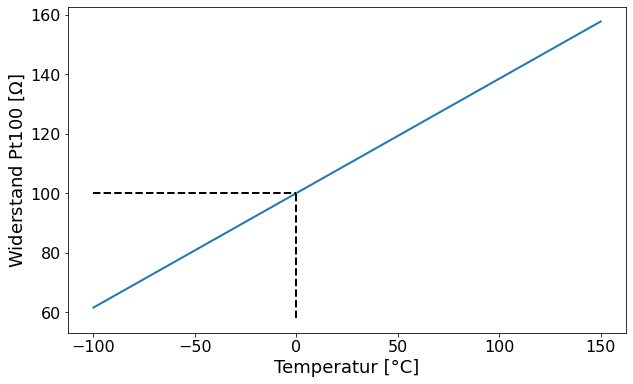

In [5]:
temperatur = np.linspace(-100,150,1000)
RPt100bei0 = 100 # Ohm
alphaPt100 = 3.85e-3 #  pro Kelvin
RPt100 = RPt100bei0*(1+alphaPt100*temperatur)
plt.plot(temperatur,RPt100)
plt.xlabel('Temperatur [°C]')
plt.ylabel('Widerstand Pt100 [$\Omega$]')
plt.plot([0,0],[58,100],'k--')
plt.plot([-100,0],[100,100],'k--')

### Widerstandsthermometer und Messstrom (nach \cite{hesselbach_energie-_2012})

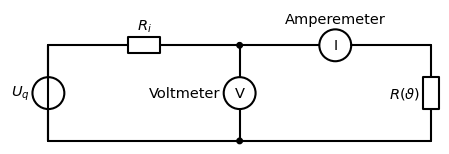

In [6]:
d = schemdraw.Drawing()
d.add(elm.RBOX,d='right',label='$R_i$',l=6)
d.add(elm.DOT)
d.push()
d.add(elm.METER_I,d='right',label='Amperemeter',l=6)
d.add(elm.RBOX,d='down',label=r'$R(\vartheta)$')
d.add(elm.LINE,d='left',l=6)
d.add(elm.DOT)
d.pop()
d.add(elm.METER_V, d='down', label='Voltmeter')
d.add(elm.LINE,d='left',l=6)
d.push()
d.add(elm.SOURCE,d='up',label='$U_q$')
d.pop()
d.add(elm.LINE,d='up')
d.draw()

- Messstrom darf Widerstand nicht nennenswert erwärmen
- bei $100\text{ }\Omega$-Widerständen $<10\text{ mA}$  
- Wärmekapazität des Messobjektes und ggf. schlechte thermische Ankopplung berücksichtigen
- Bauart von Sensoren inkl. Schutzrohr entscheidend für Lebensdauer und Stabilität der Messung
- 4-Leiter-Messung genauer als 3-Leiter-Messung, genauer als 2-Leiter-Messung, warum?

- Beispiel Genauigkeit von Platinsensoren: 
 - Klasse A $d\vartheta = \pm(0,15°C + 0,002\cdot\vartheta)$
 - Klasse B $d\vartheta = \pm(0,30°C + 0,005\cdot\vartheta)$
 - 1/3 Klasse B: $\pm\frac{1}{3}\cdot(0,30°C + 0,005\cdot\vartheta)$
- Vorteile von Widerstandsthermometern:
 - Einsatz in hohen Temperaturbereichen
 - Vibrationsfestigkeit
 - Langzeitstabilität
 - hohe Robustheit
 - hohe Genauigkeit und Reproduzierbarkeit von Messungen
- Nachteil von Widerstandsthermometern
 - längere Ansprechzeiten als Thermoelemente

### Funktionsprinzip von Thermoelementen (nach \cite{hesselbach_energie-_2012})

- thermoelektrischer Seebeck-Effekt (Festkörperphysik)
 - zwischen unterschiedlichen Metallen entsteht eine Spannung
 - bei Temperaturdifferenz $\Delta \vartheta = \vartheta_M - \vartheta_0$ Ausgleichsstrom
- Referenztemperatur: 
 - Messung mit Pt100 beim Übergang auf Kupferkabel
 - direkte elektrische Kompensation

![Thermoelement](../img/thermoelement.png)

Thermospannung von Thermoelementen:
- materialabhängige Konstante $k_{AB}$
- $U_T = k_{AB} \cdot (\vartheta_M - \vartheta_0)$
- Beispiele für Thermopaare:
 - Eisen-Konstantan (Fe-Konst, Buchstabe J)
 - Kupfer-Konstantan (Cu-Konst, Buchstabe T)
 - NiCr-CuNi, Buchstabe E
 - Standard: Nickel-Chrom/Nickel-Aluminium (NiCr-NiAl, Typ K): gute Linearität bis 1000°C, Unsicherheit ca. 1,5 K im Bereich -40°C bis 375°C
- Vorteile: geringe Kosten, sehr schnelles Ansprechverhalten
- Nachteile: absolute Messunsicherheit ca. $\pm2,5\text{ K}$ deutlich höher als bei Widerstandsthermometern - Nachkalibrieren mit Pt100 

### Thermografie (nach \cite{hesselbach_energie-_2012})

- jeder Körper mit einer Temperatur $>0\text{ K}$ emittiert Wärmestrahlung
- bei Umgebungstemperatur Maximum der Wärmestrahlung ca. bei $\lambda = 10\text{ µm}$ (Wiensches Verschiebungsgesetz)
- Atmosphäre absorbiert gering im Bereich um 10 µm $\to$ Arbeitsbereich Thermografiekameras
- Wärmestrahlung pro Fläche: $\dot{q_{\text{rad,12}}} = \sigma \varepsilon_M \left( T_M^4 - T_{\text{sky}}^4\right)$  
 - Stefan-Boltzmann-Konstante $\sigma = 5,67\cdot10^{-8}\frac{\text{W}}{\text{m}^2\text{K}^4}$
 - Empfänger temperiert auf $T_{\text{sky}}$
 - Empfängerprinzip: Quantendetektor (Fotoeffekt) oder thermische Absorption
 - Emissionsgrad Messfläche $\varepsilon_M$ - Schwachpunkt der Thermografie

Kirchhoffsches Gesetz oder die Knotenregel der Strahlungsenergie:
\begin{equation}
\alpha(\lambda) + \rho(\lambda) + \tau(\lambda) = 1
\end{equation}

![Kirchhoffsches Gesetz der Strahlung](../img/kirchhofftemperaturstrahlung.png)

Es gilt Absorption = Emission, d.h. $\alpha(\lambda) = \varepsilon(\lambda)$

selektive Absorption / Emission der Atmosphäre, insbesondere Wasserdampf (hohe Absorption - größter Anteil am Treibhauseffekt) wirkt sich erst bei großen Distanzen aus, nicht an Fassaden oder in Produktionsumfeldern bzw. an  Geräten

#### Emissionsgrad, Emissivität $\varepsilon$

- Emissionsgrad $\varepsilon(T,\lambda) = \frac{\Phi_{\text{e,OF}}(\lambda,T)}{\Phi_{\text{e,schwarz}}(\lambda)}$, dabei ist 
 - $\varepsilon \in [0,1]$
 - Strahlung der Oberfläche $\Phi_{\text{e,OF}}(\lambda,T)$
 - Strahlung eines schwarzen Körpers $\Phi_{\text{e,schwarz}}(T)$ 
 - $\varepsilon_{\text{schwarz}}(\lambda) = \varepsilon_{\text{schwarz}} = 1$
- ohne Transmission (opake Oberfläche, $\tau = 0$): $\alpha(\lambda) + \rho(\lambda)=1$
- Absorptionsgrad $\alpha(\lambda) = f(T_{\text{Strahlungsquelle}})$

#### Graue und selektive Strahler

wegen $\rho(\lambda)\neq0$ (Reflexion): 
- Graue Strahler: $\varepsilon(\lambda,T)=\varepsilon(T)<1$, z. B. elektrische Nichtleiter und Halbleiter (im Bereich um 10 µm)
- Selektive Strahler: nur Reflexion mancher Wellenlängen, manchmal $\varepsilon(\lambda_1)=1$ und manchmal $\varepsilon(\lambda_2) = 0\to$ Messfehler wegen falscher Annahmen!
- erschwerend: Spiegelung anderer Objekte in blanken Oberflächen, d.h. vorher manipulieren (schwärzen) z. B. Metalle oder Glas

#### Kalibration

- vor jeder Messung integralen Emissionsgrad $\varepsilon(T) = \int_\lambda \varepsilon (\lambda)d\lambda$ bestimmen, z. B. durch Messung der Oberflächentemperatur mit Thermoelement
- Emissionsgrad anschließend in Kamera einstellen
- doppelte Messung $\to$ Vorteil der Thermografie?
- Alternative: Markierung ausgewählter Stellen mit schwarzer, nicht reflektierender Farbe oder durch Bohren eines Loches $\to \varepsilon=1$ an diesen ausgewählten Stellen
- auch mühsam ...

#### Emissionsgrade aus dem Tabellenbuch

- fast alle nichtmetallischen Oberflchen: $\varepsilon = 0,8 .. 0,95$, siehe z. B. VDI Wärmeatlas oder VDI 3511 Blatt 4.5
- Vorsicht bei Metalloberflächen und stark reflektierenden Oberflächen

#### Thermografie-Kameras

- Ausführungen
 - Smart Phone Add On
 - ungekühlte Handheld-Geräte
 - stationäre Kameras mit Kühlung
- Vorteile
 - (x,y)-Ansicht der Temperaturverteilung
 - zeitliche Verläufe
 - schwer erreichbare Bereiche mit etwas Distanz
- Nachteil
 - teilweise große Messunsicherheit wegen Emissionsgrad

## Licht und Beleuchtung modellieren

Um Beleuchtung professionell zu planen, benötigt man eine Lichtplanung. Dafür gibt es Programme wie [dialux](https://www.dial.de/dialux/) und [relux](https://relux.com/de/). Es gibt ganze Studiengänge, die Lichtdesign betrachten, vom Aufbau der Leuchten bis hin zum farbechten Ausleuchten der gewünschten Bereiche. Wichtig ist auf jeden Fall, dass man nicht einfach nur die elektrische Leistung und die Lichtausbeute eines Leuchtmittels betrachtet und dann die Beleuchtung austauscht, ohne auf die geometrischen Eigenschaften der Leuchtmittel zu achten. <br><br>
In diese Modul ist eine umfassende Lichtplanung nicht machbar. Dennoch ist es wichtig, dass Sie dokumentieren, warum Sie welche Leuchtmittel empfehlen und welche offenen Fragen eine Lichtplanung noch klären müsste. So können Sie dann elektrisch abschätzen, welches Lastprofil sich ergibt. Häufig ergeben sich nämlich überschätzte Einsparpotenziale mit LED-Technik, wenn ungeeignete Leuchten eingesetzt werden. Unzufriedene Anwender werden dann zu Recht auf Energieeffizienz schimpfen.

Dennoch ist es möglich, Lastprofile für Beleuchtung abzuschätzen. Am besten gehen Sie so vor: 
1. Prüfen Sie eine sinnvolle Beleuchtungsanordnung mit dialux oder relux (oben verlinkt), indem sie homogene Beleuchtung auf den relevanten Flächen anstreben.
2. Zählen Sie die Leuchten zusammen.
3. Erzeugen Sie anhand von Verhaltensprofilen Beleuchtungsbedarfe für jeden Zeitpunkt.
4. Erstellen Sie daraus das Beleuchtungslastprofil.
5. Plausibilisieren Sie mit Literaturwerten. Insbesondere LED-Beleuchtungen werden häufig "schön" gerechnet, indem Leuchten mit schlechter Farbwiedergabe eingesetzt werden. Dies ist auf Dauer für Anwender nicht angenehm und im Arbeitsumfeld nicht gesund. Es lohnt sich daher auch für die Betrachtung hier, eine etwas höher qualitative Leuchte anzunehmen, mit besserer Farbwiedergabe. So wird ihre Abschätzung realistischer.

## Druckluft und Druck von Medien modellieren

Druck ist in der Verfahrenstechnik die wichtigste Größe \cite{hesselbach_energie-_2012}

- $p=\frac{F}{A}$: Druck ist Kraft pro Fläche, SI-Einheit $[p] = 1\text{ Pa} = 1\text{ N/m}^2$
- viele weitere Einheiten wie bar, mbar, mmHg, kp/cm², atm
- Druckpotenziale:
 - Absolutdruck: Druck gegenüber Vakuum mit $p_{\text{abs}} = 0\text{ Pa}$
 - Relativdruck: Druck relativ zum Atmosphärendruck (ca. $p_{\text{amb}}=10^5\text{ Pa}$)
 - Differenzdruck: Sensorausgangssignal proportional zur Differenz zwischen zwei Drücken

### Bernoulli-Gleichung: Energieerhaltung

![Bernoulli](../img/bernoulli.png)

- Energie in unterschiedlicher Form in strömenden Medien enthalten:
 - Staudruck, d.h. Druck pro Dichte $\sim p/\rho = p_{\text{stat}}$
 - kinetische Energie (Strömung) $\sim v^2/2 = p_{\text{dyn}}$
 - Lageenergie, d.h. Gravitationskonstante $g$ mal Höhe $z$, also $gz$

Bernoulli-Gleichung = Energieerhaltung:
\begin{equation}
\frac{p}{\rho} + \frac{v^2}{2} + gz = \text{const.} 
\end{equation}

- meist Vernachlässigung der Lageenergie $\to p_{\text{ges}} = p_{\text{dyn}} + p_{\text{stat}}$

- Analogie zum elektrischen Strom
 - Druck entspricht Spannung
 - Volumenfluss entspricht Strom
 - Verengungen entsprechen Widerständen
- Messung Volumenstrom bei Druckmessung indirekt möglich: $\Delta p = \text{const}\cdot\dot{V}$ 

### Druckmessung: Anbringung der Sensoren \cite{hesselbach_energie-_2012}

![Druckmessung](../img/druckmessung.png)

### Druckmessung: gängige Sensortypen (\cite{hesselbach_energie-_2012})

![Drucksensortypen](../img/drucksensortypen.png)

### Durchflussmessung \cite{hesselbach_energie-_2012}

- Vielzahl von Sensorprinzipien
- Unterschied
 - Volumenstrom-Messung $\dot{V}$, z. B. Wasserzähler
 - Massenstrom-Messung $\dot{m}$, z. B. Anemometer (z. B. Luftmassensensor)
 - Differenzdruck-Messung $v = f(\Delta p)$
- Querempfindlichkeiten: 
 - Temperatur, da $\dot{m}\sim\rho(T)$
 - elektrische Ströme bei magnetischen Verfahren für leitfähige Medien
 - Verwirbelung
 - Partikel-Anteil bei Messung der Streustrahlung eines Lasers an Partikeln in der Strömung

## Einsparungen modellieren

### Iteratives Vorgehen \cite{jens_hesselbach_praxisleitfaden_2009}

![Iteratives Vorgehen zum Ermitteln von Einsparpotenzialen](../img/iteratives-ermitteln-einsparpotenziale.png)

#### Ist-Zustand erfassen

- Systemanalyse
- Recherche
- Berechnungen
- Messungen

#### Verallgemeinerte Energiesparpotenziale

1. Energienutzung vermeiden
2. Energie**bedarf** verringern
3. Wandlerverluste reduzieren
4. Temperaturniveaus anpassen
5. Wirkungsgrad steigern
6. Energieströme vernetzen und integrieren

# References

<mark> <b>The bib file SYE.bib was not found

</b> </mark>(<a id="cit-hesselbach_energie-_2012" href="#call-hesselbach_energie-_2012">?</a>) !! _This reference was not found in SYE.bib _ !!

(<a id="cit-schellong_modellierung_2000" href="#call-schellong_modellierung_2000">?</a>) !! _This reference was not found in SYE.bib _ !!

(<a id="cit-jens_hesselbach_praxisleitfaden_2009" href="#call-jens_hesselbach_praxisleitfaden_2009">?</a>) !! _This reference was not found in SYE.bib _ !!

